# Machine Learning Project on Classification
### This project focuses on classifying different crop types using a fused optical-radar dataset collected from remote sensing images.
### The task involves applying machine learning techniques to accurately identify crop types based on spectral, polarimetric, and textural features.


In [5]:
!pip install seaborn

In [6]:


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Evaluation Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Dimensionality Reduction (optional, for high-dimensional data)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


# 1. Data Exploration

## 1.1 Understand Dataset Composition


In [7]:
# Basic data manipulation and analysis
import pandas as pd

# Load the dataset with the appropriate delimiter (adjust as needed)
file_path = 'WinnipegDataset.txt'
df = pd.read_csv(file_path, sep=",")  # Adjust sep if not comma-separated

# Display basic information
print("Dataset Information:")
df.info()

# Display first few rows
print("\nFirst few rows of data:")
print(df.head())

# Basic statistics
print("\nStatistical Summary:")
print(df.describe())

# Save to CSV
output_path = 'WinnipegDataset.csv'
df.to_csv(output_path, index=False)
print(f"\nDataset saved to {output_path}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325834 entries, 0 to 325833
Columns: 175 entries, label to f174
dtypes: float64(169), int64(6)
memory usage: 435.0 MB

First few rows of data:
   label      f1      f2       f3      f4      f5      f6      f7      f8  \
0      1 -13.559 -21.407 -11.4040 -15.248 -11.923 -15.291 -2.1548 -7.8474   
1      1 -12.802 -20.335 -10.3990 -14.132 -11.096 -14.361 -2.4039 -7.5330   
2      1 -12.431 -19.902 -10.0740 -13.598 -10.829 -14.048 -2.3566 -7.4717   
3      1 -12.689 -19.529 -10.0280 -13.350 -11.056 -14.014 -2.6611 -6.8396   
4      1 -12.686 -19.278  -9.8185 -13.108 -10.932 -13.939 -2.8675 -6.5919   

        f9  ...     f165     f166    f167      f168     f169     f170  \
0 -10.0020  ...  0.18519  0.72602  5.3333  6.000000  0.29489  9.77780   
1  -9.9369  ...  0.33333 -0.48751  2.1111  0.098765  0.83333  0.33333   
2  -9.8283  ...  0.25926  0.25298  2.2222  0.172840  0.68889  0.88889   
3  -9.5006  ...  0.16049  0.437

In [8]:
print(df.isnull().sum())

label    0
f1       0
f2       0
f3       0
f4       0
        ..
f170     0
f171     0
f172     0
f173     0
f174     0
Length: 175, dtype: int64


In [9]:
# Calculate the number of missing values in each column
missing_values = df.isnull().sum()

# Find the column with the maximum number of missing values
max_missing_column = missing_values.idxmax()
max_missing_count = missing_values.max()

print(f"Column with the highest missing values: {max_missing_column}")
print(f"Number of missing values in {max_missing_column}: {max_missing_count}")


Column with the highest missing values: label
Number of missing values in label: 0


In [10]:
# Calculate the total number of missing values in the DataFrame
total_missing_values = df.isnull().sum().sum()

print(f"Total number of missing values: {total_missing_values}")


Total number of missing values: 0


In [11]:
# Print the columns with int64 data type to check them
print(df.select_dtypes(include=['int64']).columns)

# Display the unique values in these columns to understand their meaning
for col in df.select_dtypes(include=['int64']).columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")
# print(  df['label'].unique())



Index(['label', 'f137', 'f138', 'f139', 'f140', 'f141'], dtype='object')
Unique values in column 'label': [1 2 3 4 5 6 7]
Unique values in column 'f137': [6711 6274 6215 ... 5547 7649 7980]
Unique values in column 'f138': [6143 5084 5035 ... 4472 4507 4468]
Unique values in column 'f139': [4570 3297 3033 ... 2296 2259 2219]
Unique values in column 'f140': [5064 3777 3837 ... 7613 7251 7075]
Unique values in column 'f141': [8212 8214 8588 ... 4954 5138 5475]


In [12]:
print(df['label'].dtype)

int64


In [13]:
# Convert columns f137, f138, f139, f140, f141 to float type
df[['f137', 'f138', 'f139', 'f140', 'f141']] = df[['f137', 'f138', 'f139', 'f140', 'f141']].astype(float)

# Check the data types to confirm the conversion
print(df[['f137', 'f138', 'f139', 'f140', 'f141']].dtypes)


f137    float64
f138    float64
f139    float64
f140    float64
f141    float64
dtype: object


In [14]:
print(df.isnull().sum())  # Check how many missing values are there


label    0
f1       0
f2       0
f3       0
f4       0
        ..
f170     0
f171     0
f172     0
f173     0
f174     0
Length: 175, dtype: int64


## 1.2 Clustering for Preliminary Insights

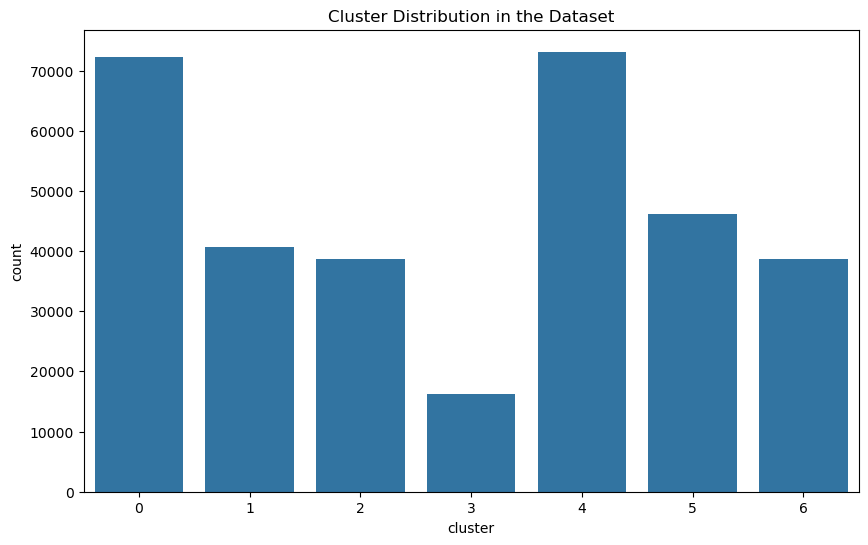

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the data
features = df.drop(columns=['label'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-means clustering
kmeans = KMeans(n_clusters=7, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the cluster distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=df)
plt.title('Cluster Distribution in the Dataset')
plt.show()


The cluster distribution plot shows that:

Clusters 0 and 4 have significantly higher counts than the other clusters, suggesting that a large portion of the data falls into these groupings.
Cluster 3 has the lowest count, which might represent either a smaller, unique subset of crop types or an outlier group with distinct characteristics.
This initial clustering could indicate natural groupings in the data, possibly related to the crop types. However, further analysis with respect to the actual crop labels could validate if these clusters align with specific crops or just data patterns. This clustering analysis will help us understand the data's inherent structure, which might guide the classification model's feature selection and preprocessing steps.

## 1.3 Visualize Feature Distributions

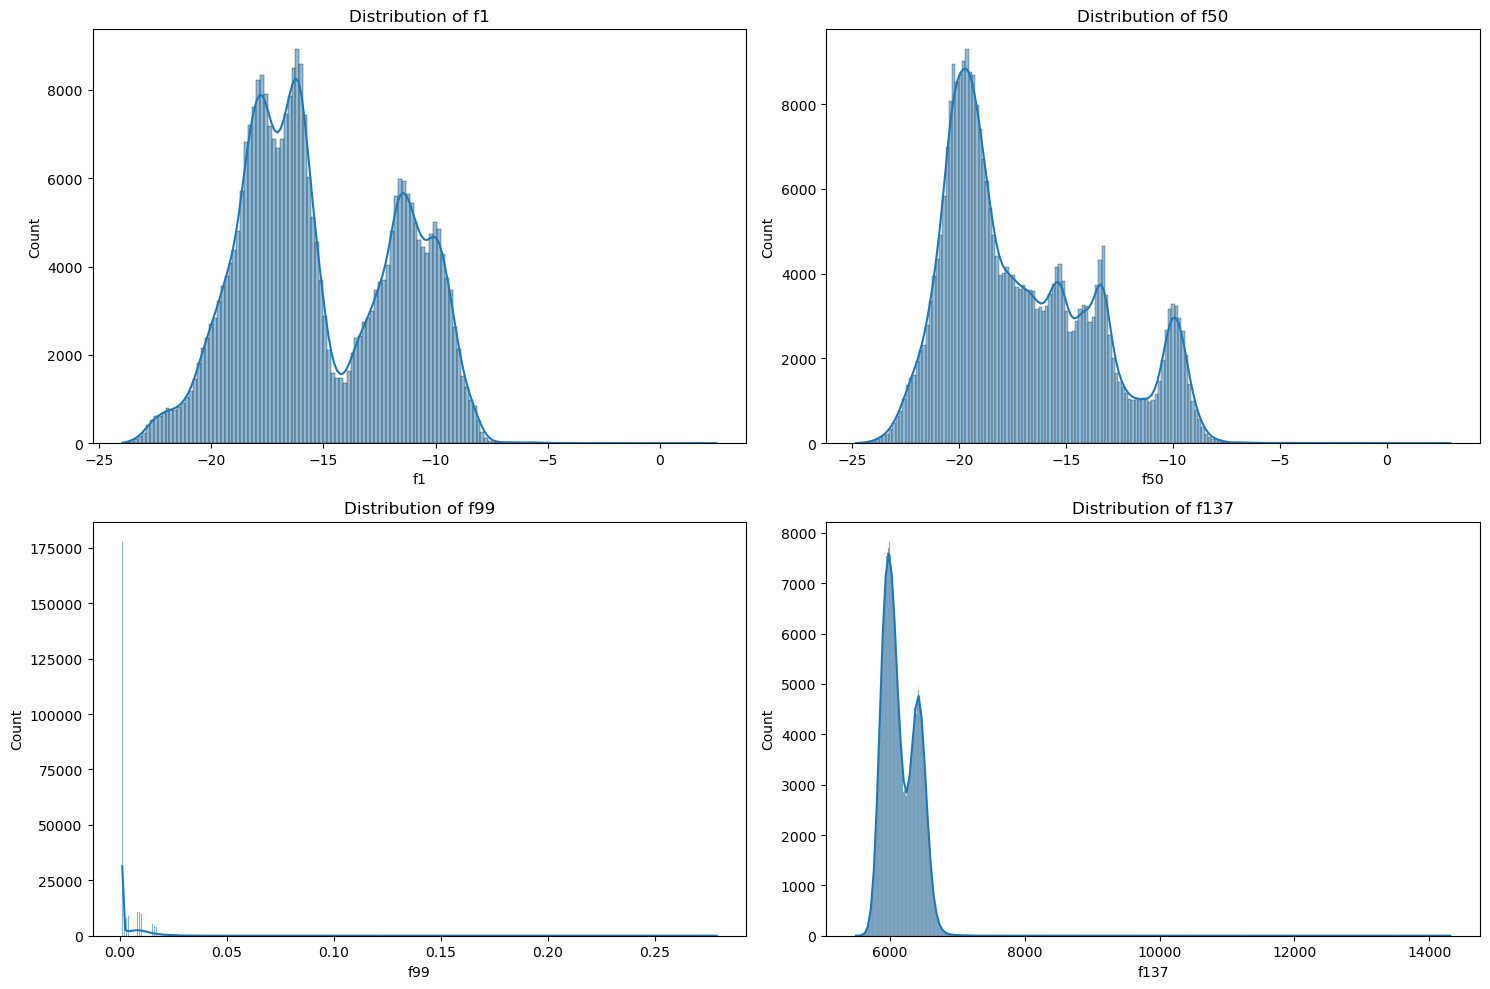

In [16]:
# Plot distributions for a sample of features
sample_features = ['f1', 'f50', 'f99', 'f137']  # Adjust features as representative
plt.figure(figsize=(15, 10))

for i, feature in enumerate(sample_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


### Code to Examine Crop Distribution in Clusters

The distribution of selected features (f1, f50, f99, f137) provides insights into the data characteristics for both radar and optical measurements:

Features f1 and f50 (presumably radar data on different dates) show multi-modal distributions. This could reflect different crop types with distinct radar reflectance patterns. The peaks in these distributions might correspond to different crop characteristics or growth stages captured by radar.
Feature f99 (likely an optical feature) is heavily skewed with most values concentrated near zero, suggesting limited variability. This could indicate that this feature might not strongly differentiate crop types, or it could require transformation (e.g., log transformation) to improve its utility.
Feature f137 shows a bi-modal distribution, which might also reflect separable characteristics among certain crop types based on optical data.

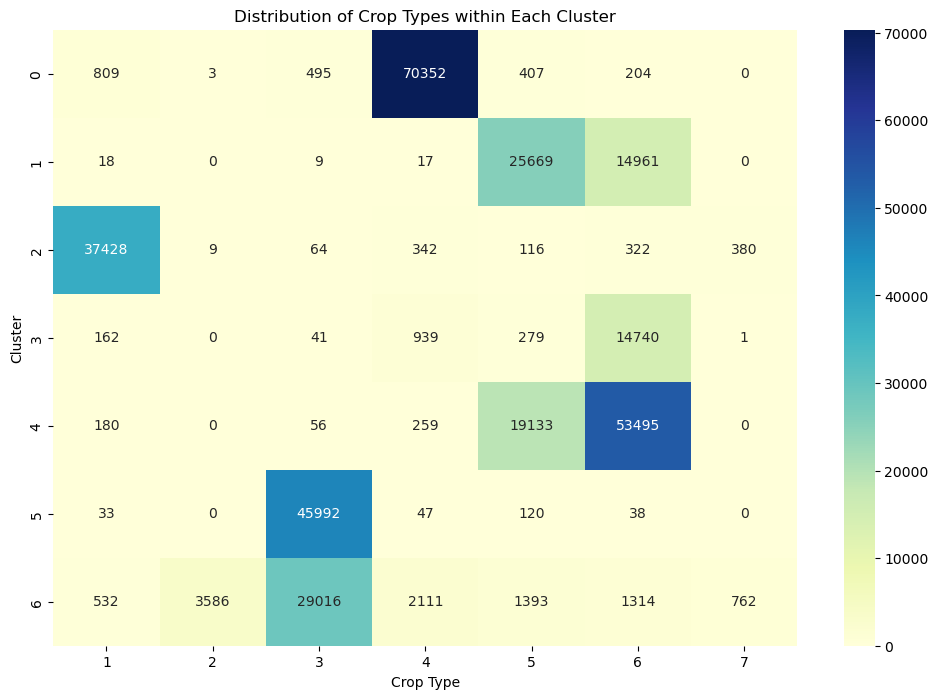

In [17]:
# Assuming 'label' is the column representing crop types and 'cluster' represents the assigned cluster
# Plotting the distribution of crop labels within each cluster

# Count the occurrences of each crop type within each cluster
cluster_label_distribution = df.groupby(['cluster', 'label']).size().unstack(fill_value=0)

# Plot the distribution of crop labels within clusters
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_label_distribution, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribution of Crop Types within Each Cluster")
plt.xlabel("Crop Type")
plt.ylabel("Cluster")
plt.show()


# 2. Data Preprocessing and Feature Engineering

There’s some overlap among other crop types, but the distinct peaks for specific crops indicate that these radar-based difference features could be valuable for classification.

#### Correlation Analysis

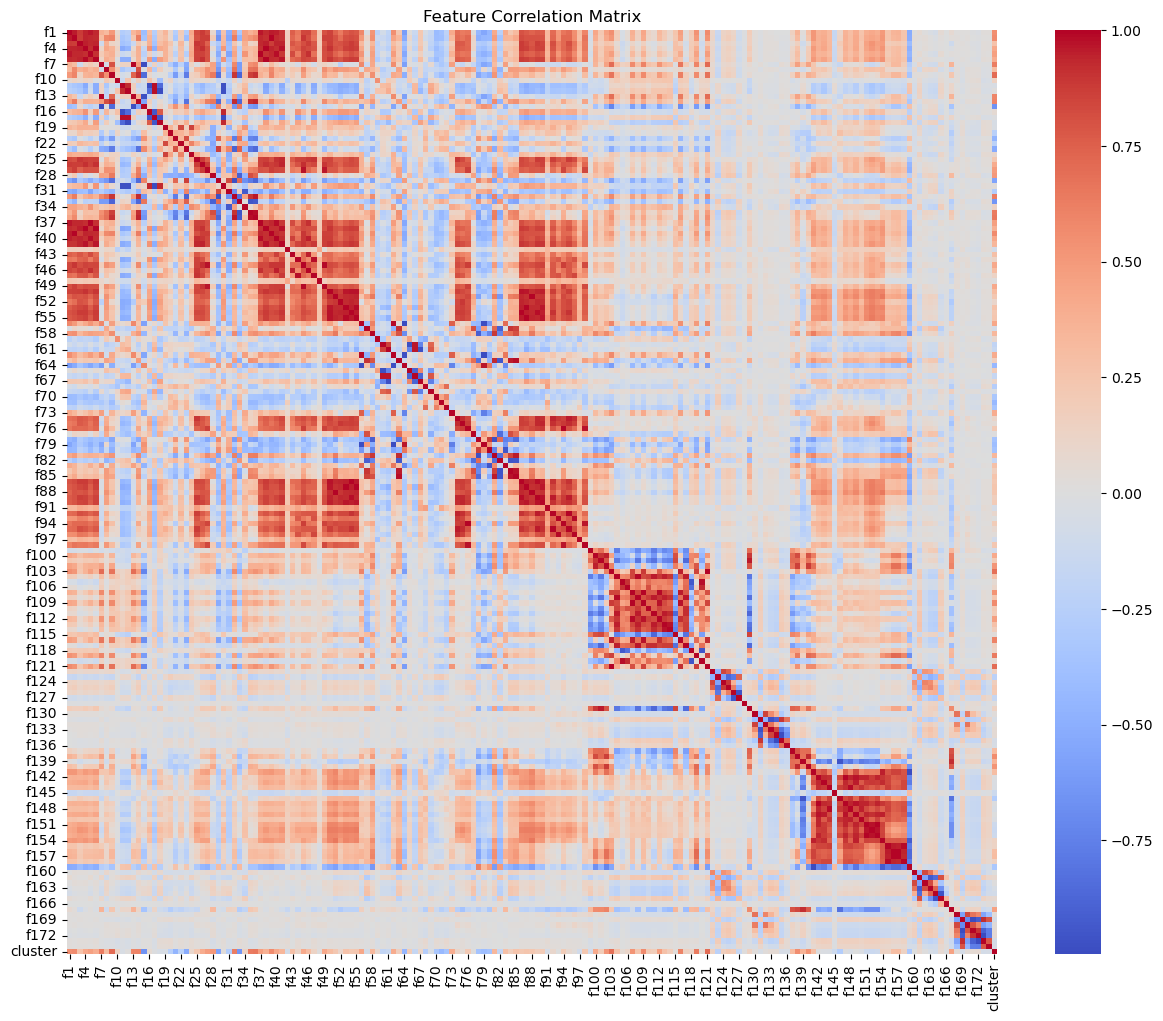

In [18]:
# Calculate the correlation matrix for all features, excluding the label column
correlation_matrix = df.drop(columns=['label']).corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Feature Correlation Matrix")
plt.show()


####  Principal Component Analysis (PCA)

In [54]:
import numpy as np
from sklearn.decomposition import PCA


# Separate features and labels

X = df.drop(columns=['label','cluster'])
y = df['label']

# Impute missing values with the mean of each column
X.fillna(X.mean(), inplace=True)

# Verify that there are no more missing values
print("Missing values after imputation:")
print(X.isnull().sum())


# Standardize the data (if necessary, you may have done this earlier)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions, retaining 95% of the variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components selected: {pca.n_components_}")



Missing values after imputation:
f1      0
f2      0
f3      0
f4      0
f5      0
       ..
f170    0
f171    0
f172    0
f173    0
f174    0
Length: 174, dtype: int64
Number of components selected: 33


In [52]:
X.shape

(325834, 175)

In [51]:
X_scaled.shape

(325834, 175)

In [42]:
X_pca.shape

(325834, 33)

In [53]:
print("Columns in X after dropping 'label':", X.columns)


Columns in X after dropping 'label': Index(['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
       ...
       'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174',
       'cluster'],
      dtype='object', length=175)


In [28]:
# Check for any NaN values in X
if X.isnull().values.any():
    print("There are NaN values in X.")
else:
    print("No NaN values in X.")

# Optionally, display the count of NaN values per column (for further inspection)
nan_counts = X.isnull().sum()
print("\nNaN values per column in X:")
print(nan_counts[nan_counts > 0])  # Only show columns with NaN values


No NaN values in X.

NaN values per column in X:
Series([], dtype: int64)


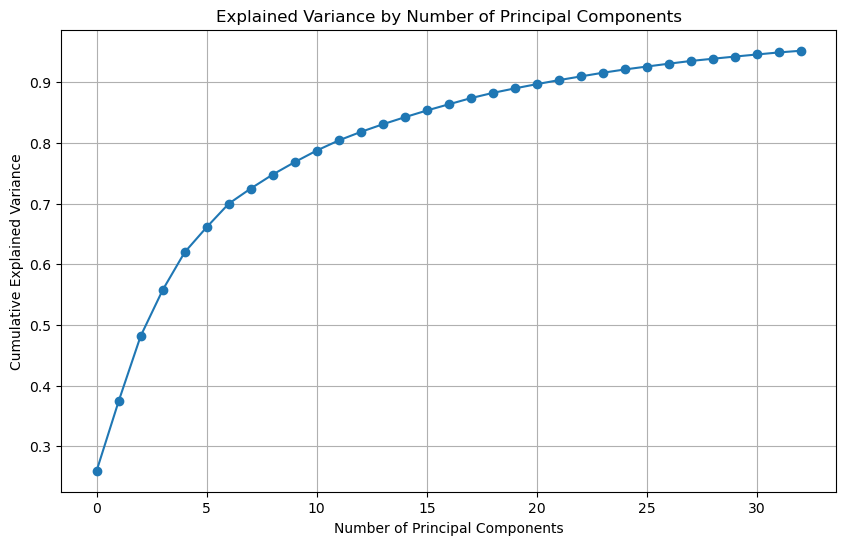

In [29]:


# Plot explained variance to determine optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.grid(True)
plt.show()


## Check for Missing Values:

In [31]:
print(df.isnull().sum())

label      0
f1         0
f2         0
f3         0
f4         0
          ..
f171       0
f172       0
f173       0
f174       0
cluster    0
Length: 176, dtype: int64


## To check the data type of each column in your DataFrame

In [32]:
print(df.dtypes)

label        int64
f1         float64
f2         float64
f3         float64
f4         float64
            ...   
f171       float64
f172       float64
f173       float64
f174       float64
cluster      int32
Length: 176, dtype: object


####   The dataset consists of one target column 'label' (int64) and 174 feature columns (float64).This confirms that all features are in numeric format, suitable for scaling and model training. No need for Label/ One Hot Encoding



In [33]:
print(df['label'].dtype)  # Check data type of the 'label' column
print(df['label'].unique())  # Check unique values to ensure all classes are represented


int64
[1 2 3 4 5 6 7]


# 3. Model Training

#Random Forest Classifier

In [34]:
from sklearn.model_selection import train_test_split

# Split the reduced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [47]:
y_train.shape

(260667,)

In [60]:
y_test.shape

(65167,)

In [35]:
# Display the first few rows of X_test
print("First few rows of X_test:")
print(X_test[:5])  # Display the first 5 rows of X_test

First few rows of X_test:
[[ 0.07373707  1.39959178 -3.37608261  0.32609367 -0.16693029 -0.79024512
  -0.35145192 -1.32064708 -1.72004616  1.76546886  0.97245813 -1.36313957
   0.70453787 -3.96987536  2.20326497  3.16174806 -0.35757548 -2.72475085
   0.64480423 -1.30480495  2.04633258 -0.05196625 -0.52142262  2.08585465
   3.09757482 -1.33372964 -0.08668806  1.38519209 -1.10474314  0.47524709
  -0.39548404  0.08143947 -0.67107165]
 [-3.58736375  5.68143641 -4.82801856  1.60756627 -5.40733703  2.01911542
  -0.16655951 -2.07196622  0.8189671   1.8104396  -1.61863758  1.74131319
  -1.20640912  0.64205522  0.56274837 -0.17599073  1.1747935  -2.15307002
  -1.1148409  -0.22192005 -0.19866868 -0.60361824 -0.42883893 -0.34568353
  -0.41528042 -0.05512747 -0.7273701  -0.08063949  0.88561042 -0.0132257
  -0.24664048  0.29613636 -0.39120245]
 [ 5.18470855  2.85424487  5.67912563 -3.25503241 -2.45801942  0.27389235
  -4.85638523  0.89157182  1.24061647 -0.71061884  1.67312265  0.88092271
  -1.6103

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = rf_model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


In [ ]:
# Check the shape of X_test
print(f"Shape of X_test: {X_test.shape}")

In [ ]:
print(f"Shape of X_test: {X_test}")

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print(classification_report(y_test, y_pred_log_reg))


# K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)


# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))


#  Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9772123927754846
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      7919
           2       0.99      0.98      0.98       708
           3       0.99      0.99      0.99     15111
           4       0.98      0.98      0.98     14858
           5       0.95      0.95      0.95      9427
           6       0.97      0.97      0.97     16914
           7       0.91      0.90      0.91       230

    accuracy                           0.98     65167
   macro avg       0.97      0.97      0.97     65167
weighted avg       0.98      0.98      0.98     65167



# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


# Artificial Neural Network (ANN)

In [58]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
ann_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the model
ann_model.fit(X_train, y_train)

# Predict on the test set
y_pred_ann = ann_model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred_ann)}")
print(classification_report(y_test, y_pred_ann))


Accuracy: 0.996485951478509
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      7919
           2       1.00      1.00      1.00       708
           3       1.00      1.00      1.00     15111
           4       1.00      1.00      1.00     14858
           5       0.99      0.99      0.99      9427
           6       1.00      1.00      1.00     16914
           7       0.97      0.98      0.97       230

    accuracy                           1.00     65167
   macro avg       0.99      0.99      0.99     65167
weighted avg       1.00      1.00      1.00     65167



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 8), yticklabels=range(1, 8))
plt.title('Confusion Matrix for ANN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# 4. Result Analysis and Visualization

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

def evaluate_model(model, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print evaluation results
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))
    print("\n" + "-"*50 + "\n")

# List of models to evaluate
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors (KNN)"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (GaussianNB(), "Naive Bayes"),
    (MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42), "Artificial Neural Network (ANN)")
]

# Evaluate all models
for model, name in models:
    evaluate_model(model, name)




## Feature Importance for Random Forest Algorithm

In [ ]:
# Feature importance for Random Forest
if hasattr(rf_model, "feature_importances_"):
    rf_importances = rf_model.feature_importances_
    rf_feature_importances = pd.DataFrame({'PC': [f'PC{i+1}' for i in range(len(rf_importances))],
                                           'Importance': rf_importances})
    rf_feature_importances = rf_feature_importances.sort_values(by='Importance', ascending=False)
    print("Top Features for Random Forest:")
    print(rf_feature_importances.head(10))


##  Cross-Validation for Each Model

In [ ]:
from sklearn.model_selection import cross_val_score

# List of models to evaluate
models = [
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (LogisticRegression(max_iter=1000, random_state=42), "Logistic Regression"),
    (KNeighborsClassifier(n_neighbors=5), "K-Nearest Neighbors (KNN)"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (GaussianNB(), "Naive Bayes"),
    (MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42), "Artificial Neural Network (ANN)")
]

# Perform cross-validation for all models
for model, name in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # 5-fold cross-validation
    print(f"--- {name} ---")
    print(f"Cross-validation score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
    print("-" * 50)


In [ ]:
# Count the number of crops in each class (label)
class_counts = y.value_counts()

# Print the number of crops in each class
print("Number of crops in each class:")
print(class_counts)
# Example dictionary that maps class labels to crop names
crop_names = {
    1: 'Corn',
    2: 'Wheat',
    3: 'Soybeans',
    4: 'Canola',
    5: 'Peas',
    6: 'Oats',
    7: 'Barley'
}

# Map class labels to crop names
y_named = y.map(crop_names)

# Count the number of crops for each crop type
crop_counts = y_named.value_counts()

# Print the count of crops for each crop name
print("Number of crops for each crop type:")
print(crop_counts)



In [57]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("DTR_Classifier.pkl","wb")
pickle.dump(dt_model, pickle_out)
pickle_out.close()

In [59]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("ANN_Classifier.pkl","wb")
pickle.dump(ann_model, pickle_out)
pickle_out.close()

In [55]:
import pickle

# Save the retrained PCA model
with open("PCA_model.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)


In [ ]:
import pickle
from sklearn.decomposition import PCA

# Assuming PCA has been applied to your training data (X_train)
pca = PCA(n_components=33)
X_train_pca = pca.fit_transform(X_train)

# Save the PCA model to disk for later use
with open("PCA_model.pkl", "wb") as pca_file:
    pickle.dump(pca, pca_file)
